In [1]:
import numpy as np
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_csv("Spotify_Youtube.csv")
df1.head(2)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [3]:
dfSummary(df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 10358.5 (5980.9)min < med < max:0.0 < 10358.5 < 20717.0IQR (CV) : 10358.5 (1.7),"20,718 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3UMQoCMRBAURXLqbOFjRfxEJ5gzpYTeArvsY2FqdOvrQgLaVbB/1+ZDGHgQ/bLsuz0/w6/XkDfcVy7KKVcI2IaeaT3fo6I2dnx2Y33eLbWbu9nq6EjYsrMx8jDtdZLZt6dHZ/deI/T55lfN4ShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxga4gWhg1ey46OS8wAAAABJRU5ErkJggg=="">",0(0.0%)
2,Artist[object],1. Gorillaz2. Die drei !!!3. Hollywood Undead4. Empire of the Sun5. White Noise for Babies6. IU7. Kizzy8. Alan Gomez9. RÜFÜS DU SOL10. Bo Burnham11. other,"10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)20,618 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
3,Url_spotify[object],1. https://open.spotify.com/artis2. https://open.spotify.com/artis3. https://open.spotify.com/artis4. https://open.spotify.com/artis5. https://open.spotify.com/artis6. https://open.spotify.com/artis7. https://open.spotify.com/artis8. https://open.spotify.com/artis9. https://open.spotify.com/artis10. https://open.spotify.com/artis11. other,"10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)20,618 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4YeKFiRcmXph4YeKFHXPO792P4JljjPHe/QiecTbDxAsTL0y8MPHCxAsTL0y8MPHCxAs7xhi/ux/BM9MPSF3OZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhhJqEwk1CYsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGHihdnzwux5Yc5mmD0vzJ4X5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGzfM8f9Zar90P4XNfa63XdV1/ux/C55zNMPHCxAsTL0y8MPHCxAsTL0y8MPHCfNsMMwmFOZth4oWJFyZemHhh4oX9A5gQNK7t5DBkAAAAAElFTkSuQmCC"">",0(0.0%)
4,Track[object],"1. El Ultimo Adiós - Varios Artis2. Color Esperanza 20203. Resistiré4. Roll Me Up and Smoke Me When I5. Valentine's Mashup 20196. Heaven7. Y, ¿Si Fuera Ella? - + Es +8. 52 Non Stop Dilbar Dilbar Remi9. Angel10. Home11. other","24 (0.1%)19 (0.1%)14 (0.1%)9 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)7 (0.0%)7 (0.0%)20,602 (99.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACCklEQVR4nO3asW3EMBQFQVJwyFS4Ds71uAL17dx1yDWcEmKBmQoILPADPc37vgdNx+4H8Jx4Ye

In [4]:
df1.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
df1 = df1.drop(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type','Uri','Url_youtube','Title', 
                'Channel','Description', 'Licensed', 'official_video'], axis = 1)

In [6]:
dfSummary(df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Danceability[float64],Mean (sd) : 0.6 (0.2)min < med < max:0.0 < 0.6 < 1.0IQR (CV) : 0.2 (3.8),898 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUUlEQVR4nO3asY3CMBiGYYNOSgpfGwq6LAALMMRN4PbWygTXsREFqdNEihRKKnQ2cWyT731qF5Ze8ZM43s3zbLB9+9wbQBpfuTdQuqZpfqy1B5+1wzDc+77/W3tP7yD0P6y1B+fczWdt13XHtffzLka3CH7REY3jeG7b9td3fcpRT+iIqqr69h3zxqQd9YxuEYQWQWgRhBZBaBGEFiH5ehVyrDlN08kY4/3KVCrJ0IHHmpe195MCo1sEoUUQWgShRRBaBKFFEFqE5Ht0KUIuKiy9pEDojEIuKiy9pMDoFkFoEYQWsZn/aMUvUiE2E1rxi1QIRrcIQosgtAhCiyC0CEKLILQIQosgtAhCiyj6CJTz63iKDs35dTyMbhGEFlH06MbT0ouEhP4QSy8SJg/Nk3QeyUPzJJ0HD2MiovyiGcflexk6JF5d1yfn3NVnLeM4jwciYmwhiILCHwAAAABJRU5ErkJggg=="">",2(0.0%)
2,Energy[float64],Mean (sd) : 0.6 (0.2)min < med < max:0.0 < 0.7 < 1.0IQR (CV) : 0.3 (3.0),"1,268 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABXklEQVR4nO3aMW6DMBiGYVpVgsFdydCl4gLpBXKInuBfey2foFtv0HtkyVBmL0hIZMoYxQ4EU3/vM1uRpVf5MRZP0zRVKN9z7g1gHS+5N1CStm0/nXO72PUhhL++778fuacLQt+QEq9pmr2Z/cT+tvf+7f6dpSH0Dc65nZmdYtZ67w+P3s+9eEaLILQIQovgGZ3RMAwfXdd9xayde0IndEZ1Xb8mHPRmndAZ3SIILYLQIiSf0Sm3XeM47quqinqObplk6FJuu1IwukUQWgShRRBaBKFFEFoEoUUQWgShRRRzM6Z4rZmimNCK15opGN0iCC2imNFdurnflxH6n5j7fRmjWwShRRBaBKFFbPowxm3XcjYdmtuu5TC6RRBaBKFFEFoEoUWsfurmlSmP1UPzypQHo1vE1X90yogNIbw7544xaxnHeVwNnTpizew3dm3s5rAcRrcIQosgtAhCizgDKbJpQS3ddcUAAAAASUVORK5CYII="">",2(0.0%)
3,Key[float64],Mean (sd) : 5.3 (3.6)min < med < max:0.0 < 5.0 < 11.0IQR (CV) : 6.0 (1.5),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABTUlEQVR4nO3aMQ6CMBiG4WpMWOoKgxsX0At4CE/A6rU4gadykJmFhAQvIEJDW2u/91k12OSN5W9gN02TQf72v14A4jjMfVCW5c1aW625SN/3r67rHv6WBd9mQ1trq6Zpnmsu0rbtyd+SEAJbtwhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtIjZp1dIy9bHxoT+E1sfG7N1iyC0CEKLILQIQosgtAhCi+AcvSCX99sJvSCX99vZukV4+UcPw3Cp6/q+5rspb2+xudwWxnE8G2NW7SyfeAldFMUxh+0tNsfbwnXLb7F1i8hmGMtlOg4lm9C5TMehJB065rDig8tQakzcNScdOtSw4hLEJYbLUGrM9gHLRdKhQ3E8JUSLERJTtwhCiyC0CEKLILQIQouIfrwKdYbFd9FDK55hU8DWLYLQIggtgtAiCC3iDVuleq3t7ZaqAAAAAElFTkSuQmCC"">",2(0.0%)
4,Loudness[float64],Mean (sd) : -7.7 (4.6)min < med < max:-46.3 < -6.5 < 0.9IQR (CV) : 3.9 (-1.7),"9,417 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABL0lEQVR4nO3cMUrEQBSA4acspBnbbGEjuYBewEPsCdJ6rTmBV7KxMHWaQCC2FsJmTDbZ9f+/eiADP/tYAnl30zSF/r/7vS+gbRz2vgBZXdenlNJxztm+77+6rnv/67MMvaOU0rFt2885Z3POj0ue5eiGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BB+CL+ikg0GERHjOD5HxKwP4Zcy9IpKNhhEROScXy95n58c3RCGhjA0hKEh/DN2I4ZheGma5m3O2d92khn6RlRV9bBkJ5mjG8LQEI7uM0redm35pquUoc8o3Ne52ZuuUo5uiKv+RReuOX5KKX2sffaax3GJb38wPieYa3C2AAAAAElFTkSuQmCC"">",2(0.0%)
5,Speechiness[float64],Mean (sd) : 0.1 (0.1)min < med < max:0.0 < 0.1 < 1.0IQR (CV) : 0.1 (0.9),"1,303 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABB0lEQVR4nO3cPQ6CMBxAcTUmLHWFwa0n8B5OnoDVM7FxAk/lIDMLE54AQ5PyEd/7rZCmyUvaTv/jOI4H/b/T1hvQOs5TH8qyfIQQqjmL9H3/6brulW9bym0ydAihquv6PWeRtm2v+bakJXh0QxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDTE5FSiFMMw3GKMzzn/OqpqG1lCF0VxcVTVvnl0QxgawtAQWe7oFD7ctrF66JSHW9M09xijg2czWD10Cl/z+ew6dAqvhN++xFxFLWsX87QAAAAASUVORK5CYII="">",2(0.0%)
6,Acou

In [7]:
df1.Views.fillna(df1.Views.median(),inplace=True)
df1.Likes.fillna(df1.Likes.median(),inplace=True)
df1.Comments.fillna(df1.Comments.median(),inplace=True)
df1.Stream.fillna(df1.Stream.median(),inplace=True)

In [8]:
dfSummary(df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Danceability[float64],Mean (sd) : 0.6 (0.2)min < med < max:0.0 < 0.6 < 1.0IQR (CV) : 0.2 (3.8),898 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUUlEQVR4nO3asY3CMBiGYYNOSgpfGwq6LAALMMRN4PbWygTXsREFqdNEihRKKnQ2cWyT731qF5Ze8ZM43s3zbLB9+9wbQBpfuTdQuqZpfqy1B5+1wzDc+77/W3tP7yD0P6y1B+fczWdt13XHtffzLka3CH7REY3jeG7b9td3fcpRT+iIqqr69h3zxqQd9YxuEYQWQWgRhBZBaBGEFiH5ehVyrDlN08kY4/3KVCrJ0IHHmpe195MCo1sEoUUQWgShRRBaBKFFEFqE5Ht0KUIuKiy9pEDojEIuKiy9pMDoFkFoEYQWsZn/aMUvUiE2E1rxi1QIRrcIQosgtAhCiyC0CEKLILQIQosgtAhCiyj6CJTz63iKDs35dTyMbhGEFlH06MbT0ouEhP4QSy8SJg/Nk3QeyUPzJJ0HD2MiovyiGcflexk6JF5d1yfn3NVnLeM4jwciYmwhiILCHwAAAABJRU5ErkJggg=="">",2(0.0%)
2,Energy[float64],Mean (sd) : 0.6 (0.2)min < med < max:0.0 < 0.7 < 1.0IQR (CV) : 0.3 (3.0),"1,268 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABXklEQVR4nO3aMW6DMBiGYVpVgsFdydCl4gLpBXKInuBfey2foFtv0HtkyVBmL0hIZMoYxQ4EU3/vM1uRpVf5MRZP0zRVKN9z7g1gHS+5N1CStm0/nXO72PUhhL++778fuacLQt+QEq9pmr2Z/cT+tvf+7f6dpSH0Dc65nZmdYtZ67w+P3s+9eEaLILQIQovgGZ3RMAwfXdd9xayde0IndEZ1Xb8mHPRmndAZ3SIILYLQIiSf0Sm3XeM47quqinqObplk6FJuu1IwukUQWgShRRBaBKFFEFoEoUUQWgShRRRzM6Z4rZmimNCK15opGN0iCC2imNFdurnflxH6n5j7fRmjWwShRRBaBKFFbPowxm3XcjYdmtuu5TC6RRBaBKFFEFoEoUWsfurmlSmP1UPzypQHo1vE1X90yogNIbw7544xaxnHeVwNnTpizew3dm3s5rAcRrcIQosgtAhCizgDKbJpQS3ddcUAAAAASUVORK5CYII="">",2(0.0%)
3,Key[float64],Mean (sd) : 5.3 (3.6)min < med < max:0.0 < 5.0 < 11.0IQR (CV) : 6.0 (1.5),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABTUlEQVR4nO3aMQ6CMBiG4WpMWOoKgxsX0At4CE/A6rU4gadykJmFhAQvIEJDW2u/91k12OSN5W9gN02TQf72v14A4jjMfVCW5c1aW625SN/3r67rHv6WBd9mQ1trq6Zpnmsu0rbtyd+SEAJbtwhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtIjZp1dIy9bHxoT+E1sfG7N1iyC0CEKLILQIQosgtAhCi+AcvSCX99sJvSCX99vZukV4+UcPw3Cp6/q+5rspb2+xudwWxnE8G2NW7SyfeAldFMUxh+0tNsfbwnXLb7F1i8hmGMtlOg4lm9C5TMehJB065rDig8tQakzcNScdOtSw4hLEJYbLUGrM9gHLRdKhQ3E8JUSLERJTtwhCiyC0CEKLILQIQouIfrwKdYbFd9FDK55hU8DWLYLQIggtgtAiCC3iDVuleq3t7ZaqAAAAAElFTkSuQmCC"">",2(0.0%)
4,Loudness[float64],Mean (sd) : -7.7 (4.6)min < med < max:-46.3 < -6.5 < 0.9IQR (CV) : 3.9 (-1.7),"9,417 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABL0lEQVR4nO3cMUrEQBSA4acspBnbbGEjuYBewEPsCdJ6rTmBV7KxMHWaQCC2FsJmTDbZ9f+/eiADP/tYAnl30zSF/r/7vS+gbRz2vgBZXdenlNJxztm+77+6rnv/67MMvaOU0rFt2885Z3POj0ue5eiGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BB+CL+ikg0GERHjOD5HxKwP4Zcy9IpKNhhEROScXy95n58c3RCGhjA0hKEh/DN2I4ZheGma5m3O2d92khn6RlRV9bBkJ5mjG8LQEI7uM0redm35pquUoc8o3Ne52ZuuUo5uiKv+RReuOX5KKX2sffaax3GJb38wPieYa3C2AAAAAElFTkSuQmCC"">",2(0.0%)
5,Speechiness[float64],Mean (sd) : 0.1 (0.1)min < med < max:0.0 < 0.1 < 1.0IQR (CV) : 0.1 (0.9),"1,303 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABB0lEQVR4nO3cPQ6CMBxAcTUmLHWFwa0n8B5OnoDVM7FxAk/lIDMLE54AQ5PyEd/7rZCmyUvaTv/jOI4H/b/T1hvQOs5TH8qyfIQQqjmL9H3/6brulW9bym0ydAihquv6PWeRtm2v+bakJXh0QxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDTE5FSiFMMw3GKMzzn/OqpqG1lCF0VxcVTVvnl0QxgawtAQWe7oFD7ctrF66JSHW9M09xijg2czWD10Cl/z+ew6dAqvhN++xFxFLWsX87QAAAAASUVORK5CYII="">",2(0.0%)
6,Acou

In [9]:
df1 = df1.dropna()

In [10]:
dfSummary(df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Danceability[float64],Mean (sd) : 0.6 (0.2)min < med < max:0.0 < 0.6 < 1.0IQR (CV) : 0.2 (3.8),898 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUUlEQVR4nO3asY3CMBiGYYNOSgpfGwq6LAALMMRN4PbWygTXsREFqdNEihRKKnQ2cWyT731qF5Ze8ZM43s3zbLB9+9wbQBpfuTdQuqZpfqy1B5+1wzDc+77/W3tP7yD0P6y1B+fczWdt13XHtffzLka3CH7REY3jeG7b9td3fcpRT+iIqqr69h3zxqQd9YxuEYQWQWgRhBZBaBGEFiH5ehVyrDlN08kY4/3KVCrJ0IHHmpe195MCo1sEoUUQWgShRRBaBKFFEFqE5Ht0KUIuKiy9pEDojEIuKiy9pMDoFkFoEYQWsZn/aMUvUiE2E1rxi1QIRrcIQosgtAhCiyC0CEKLILQIQosgtAhCiyj6CJTz63iKDs35dTyMbhGEFlH06MbT0ouEhP4QSy8SJg/Nk3QeyUPzJJ0HD2MiovyiGcflexk6JF5d1yfn3NVnLeM4jwciYmwhiILCHwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Energy[float64],Mean (sd) : 0.6 (0.2)min < med < max:0.0 < 0.7 < 1.0IQR (CV) : 0.3 (3.0),"1,268 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABXklEQVR4nO3aMW6DMBiGYVpVgsFdydCl4gLpBXKInuBfey2foFtv0HtkyVBmL0hIZMoYxQ4EU3/vM1uRpVf5MRZP0zRVKN9z7g1gHS+5N1CStm0/nXO72PUhhL++778fuacLQt+QEq9pmr2Z/cT+tvf+7f6dpSH0Dc65nZmdYtZ67w+P3s+9eEaLILQIQovgGZ3RMAwfXdd9xayde0IndEZ1Xb8mHPRmndAZ3SIILYLQIiSf0Sm3XeM47quqinqObplk6FJuu1IwukUQWgShRRBaBKFFEFoEoUUQWgShRRRzM6Z4rZmimNCK15opGN0iCC2imNFdurnflxH6n5j7fRmjWwShRRBaBKFFbPowxm3XcjYdmtuu5TC6RRBaBKFFEFoEoUWsfurmlSmP1UPzypQHo1vE1X90yogNIbw7544xaxnHeVwNnTpizew3dm3s5rAcRrcIQosgtAhCizgDKbJpQS3ddcUAAAAASUVORK5CYII="">",0(0.0%)
3,Key[float64],Mean (sd) : 5.3 (3.6)min < med < max:0.0 < 5.0 < 11.0IQR (CV) : 6.0 (1.5),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABTUlEQVR4nO3aMQ6CMBiG4WpMWOoKgxsX0At4CE/A6rU4gadykJmFhAQvIEJDW2u/91k12OSN5W9gN02TQf72v14A4jjMfVCW5c1aW625SN/3r67rHv6WBd9mQ1trq6Zpnmsu0rbtyd+SEAJbtwhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtIjZp1dIy9bHxoT+E1sfG7N1iyC0CEKLILQIQosgtAhCi+AcvSCX99sJvSCX99vZukV4+UcPw3Cp6/q+5rspb2+xudwWxnE8G2NW7SyfeAldFMUxh+0tNsfbwnXLb7F1i8hmGMtlOg4lm9C5TMehJB065rDig8tQakzcNScdOtSw4hLEJYbLUGrM9gHLRdKhQ3E8JUSLERJTtwhCiyC0CEKLILQIQouIfrwKdYbFd9FDK55hU8DWLYLQIggtgtAiCC3iDVuleq3t7ZaqAAAAAElFTkSuQmCC"">",0(0.0%)
4,Loudness[float64],Mean (sd) : -7.7 (4.6)min < med < max:-46.3 < -6.5 < 0.9IQR (CV) : 3.9 (-1.7),"9,417 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABL0lEQVR4nO3cMUrEQBSA4acspBnbbGEjuYBewEPsCdJ6rTmBV7KxMHWaQCC2FsJmTDbZ9f+/eiADP/tYAnl30zSF/r/7vS+gbRz2vgBZXdenlNJxztm+77+6rnv/67MMvaOU0rFt2885Z3POj0ue5eiGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BB+CL+ikg0GERHjOD5HxKwP4Zcy9IpKNhhEROScXy95n58c3RCGhjA0hKEh/DN2I4ZheGma5m3O2d92khn6RlRV9bBkJ5mjG8LQEI7uM0redm35pquUoc8o3Ne52ZuuUo5uiKv+RReuOX5KKX2sffaax3GJb38wPieYa3C2AAAAAElFTkSuQmCC"">",0(0.0%)
5,Speechiness[float64],Mean (sd) : 0.1 (0.1)min < med < max:0.0 < 0.1 < 1.0IQR (CV) : 0.1 (0.9),"1,303 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABB0lEQVR4nO3cPQ6CMBxAcTUmLHWFwa0n8B5OnoDVM7FxAk/lIDMLE54AQ5PyEd/7rZCmyUvaTv/jOI4H/b/T1hvQOs5TH8qyfIQQqjmL9H3/6brulW9bym0ydAihquv6PWeRtm2v+bakJXh0QxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDTE5FSiFMMw3GKMzzn/OqpqG1lCF0VxcVTVvnl0QxgawtAQWe7oFD7ctrF66JSHW9M09xijg2czWD10Cl/z+ew6dAqvhN++xFxFLWsX87QAAAAASUVORK5CYII="">",0(0.0%)
6,Acou

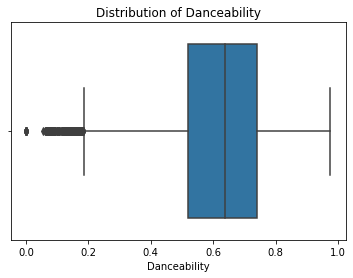

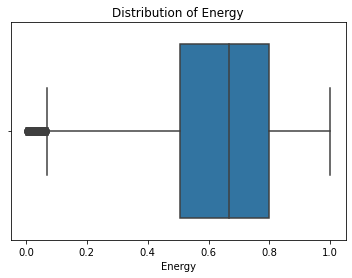

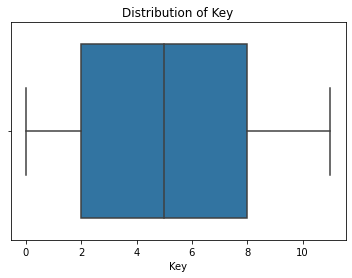

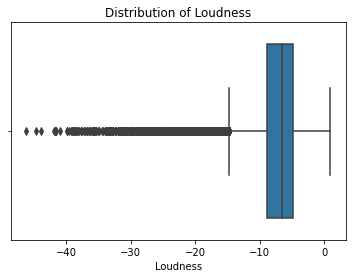

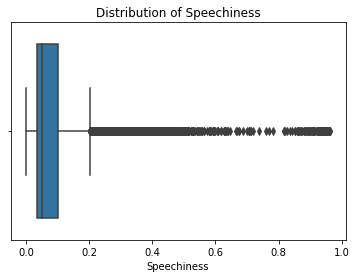

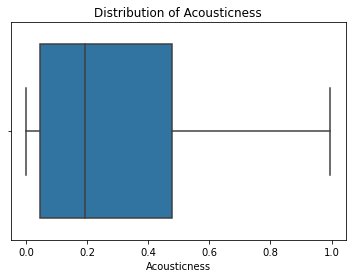

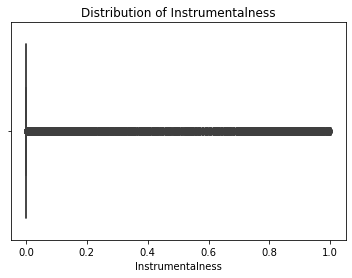

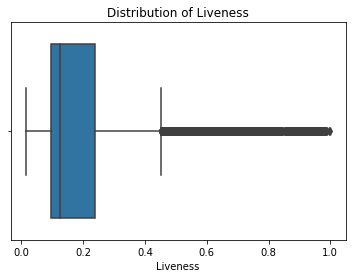

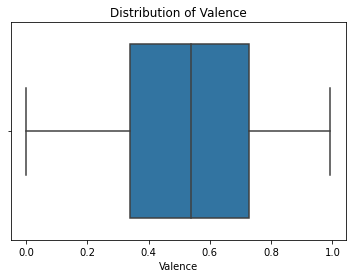

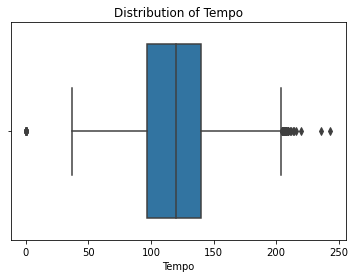

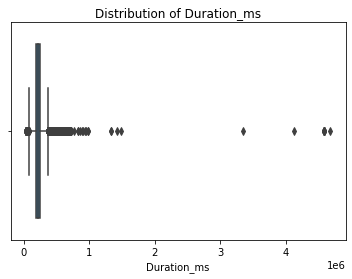

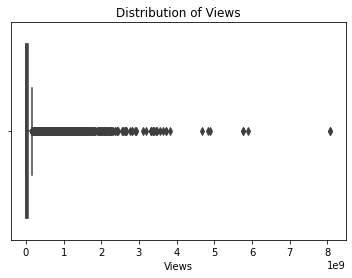

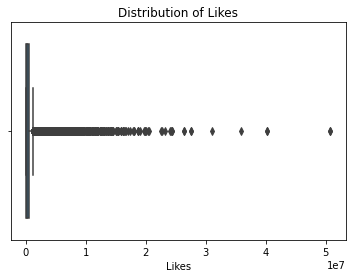

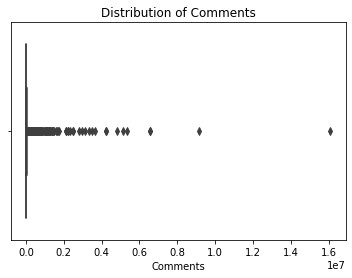

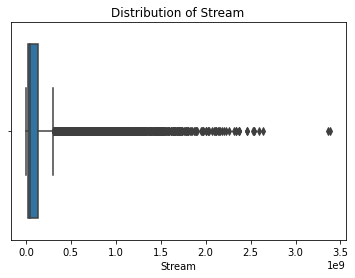

In [11]:
for i in range(len(df1.columns)):
    sns.boxplot(x = df1[df1.columns[i]])
    plt.title(f"Distribution of {df1.columns[i]}")
    plt.xlabel(df1.columns[i])
    plt.show()

<AxesSubplot:>

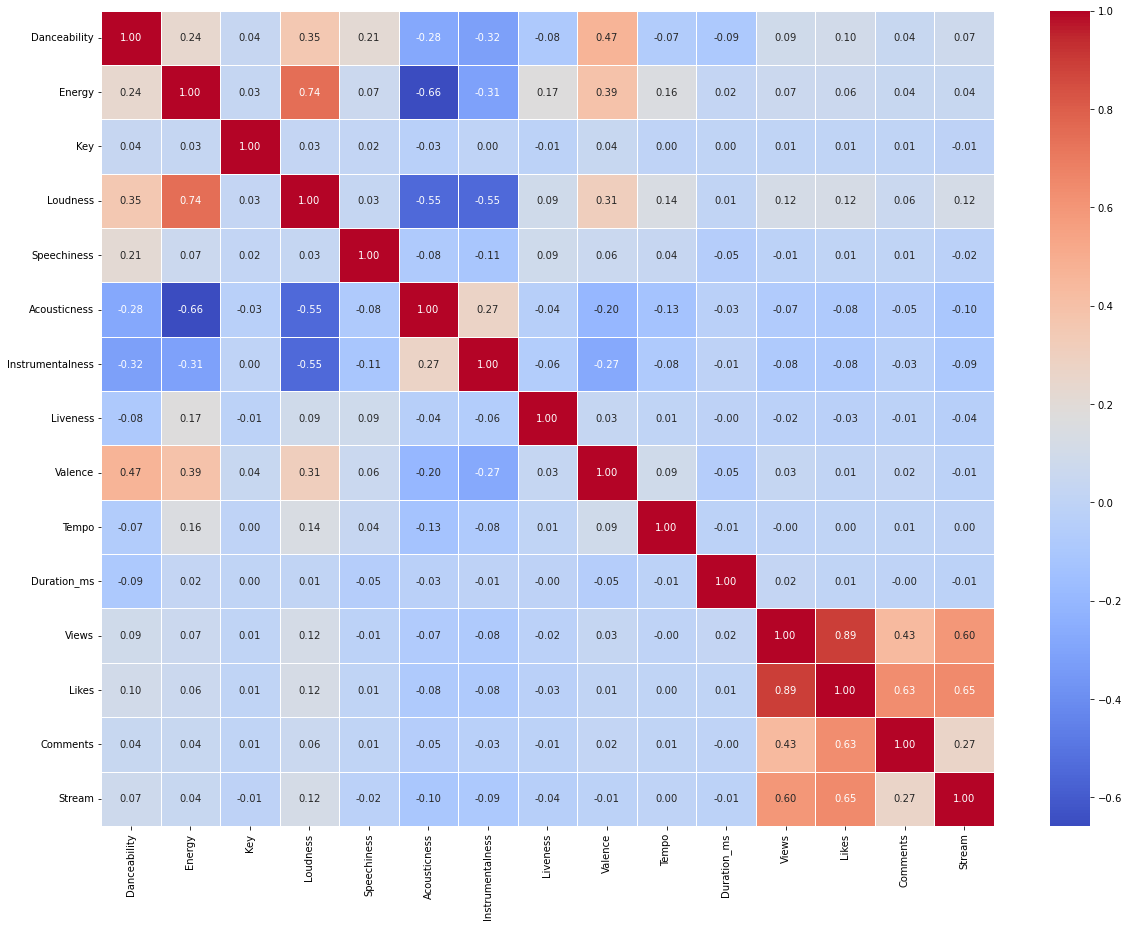

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))
corr_matrix1 = df1.corr()
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt='.2f', ax = ax, linewidths=0.5)

In [13]:
df1.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'],
      dtype='object')

In [14]:
X1 = df1[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo','Duration_ms','Likes', 'Comments', 'Stream']]
Y1 = df1['Views']

In [15]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 11)
X_pca1 = pca1.fit_transform(X1)
X_pca1.shape

(20716, 11)

In [16]:
df1.to_csv("Dataset(Medium).csv")

In [17]:
df2 = pd.read_csv("cancer_reg.csv")
df2.head()

,index,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [18]:
dfSummary(df2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,index[int64],Mean (sd) : 1523.0 (879.7)min < med < max:0.0 < 1523.0 < 3046.0IQR (CV) : 1523.0 (1.7),"3,047 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3UMQoCMRBAURXLqbOFjRfxEJ5gzpYTeArvsY2FqdOvrQgLaVbB/1+ZDGHgQ/bLsuz0/w6/XkDfcVy7KKVcI2IaeaT3fo6I2dnx2Y33eLbWbu9nq6EjYsrMx8jDtdZLZt6dHZ/deI/T55lfN4ShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxga4gWhg1ey46OS8wAAAABJRU5ErkJggg=="">",0(0.0%)
2,avganncount[float64],Mean (sd) : 606.3 (1416.4)min < med < max:6.0 < 171.0 < 38150.0IQR (CV) : 442.0 (0.4),929 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA4ElEQVR4nO3csQ3CMBBAUUCUVycFnSdgFSZwy1qZgKkocO3GlZkgkpECkfj/tbZOJ33JpY+994P+32nvBfQb57WDaZpuETGPDKm1vkopj+3W0tZWQ0fEnHN+jgxZluWy3Ur6Bp9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWP3d9xOttWtK6T5y1y+f9/EGZDMavd3j8EcAAAAASUVORK5CYII="">",0(0.0%)
3,avgdeathsperyear[int64],Mean (sd) : 186.0 (504.1)min < med < max:3.0 < 61.0 < 14010.0IQR (CV) : 121.0 (0.4),608 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA4ElEQVR4nO3csQ3CMBBAUUCUVycFnSdgFSZwy1qZgKkocO3GlZkgkpECkfj/tbZOJ33JpY+994P+32nvBfQb57WDaZpuETGPDKm1vkopj+3W0tZWQ0fEnHN+jgxZluWy3Ur6Bp9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWP3d9xOttWtK6T5y1y+f9/EGZDMavd3j8EcAAAAASUVORK5CYII="">",0(0.0%)
4,target_deathrate[float64],Mean (sd) : 178.7 (27.8)min < med < max:59.7 < 178.1 < 362.8IQR (CV) : 34.0 (6.4),"1,053 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABHElEQVR4nO3cvQmDQBxAcRMCNpdWi3QukCyQITKBbdZygkyVItY2gmAmSFDw89771Vf84cHBHZ6Hvu8Txe+49gBaxmntAf7JsuwRQsiHrG2a5lPX9WvumfZq06FDCHlZlu8ha6uqusw9z565dUMYGsLQEIaGMDSEoSE2fbwao23bW1EUzyFriWfuaEKnaXr2zP2bWzeEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWPwD/jF/Mei67pokyaCP8vXf4qFH/sXgPvc8FG7dENG8vRqD+CAPGZr4IM+tG8LQEIaGMDSEoSEMDWFoiEnO0THfX8dyuTJJ6Jjvr2O5XPkCIxxPzcf4RPwAAAAASUVORK5CYII="">",0(0.0%)
5,incidencerate[float64],Mean (sd) : 448.3 (54.6)min < med < max:201.3 < 453.5 < 1206.9IQR (CV) : 60.6 (8.2),"1,506 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABCElEQVR4nO3csQnCQBhA4VOENGebFHZZQBdwCCdI61qZwKksTJ0mEIgTKAlcTsl7X31wPzwIR4p/N01T0Pbtfz2A8jjkvrAsy1uMsZpztu/7V9d1j7VnIsgeOsZYNU3znHO2bdvT2vNQ+OmGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA2RZFnNkk1D4zieQwizltUonSShF24auqa4U8tkXz+1xDAMl7qu73POupPsu78OXRTF0Z1kafgYgzA0hKEhDA1haIiPr25/gmzLG4u+LPAeoHYGAAAAAElFTkSuQmCC"">",0(0.0%)
6,medincome[int64],Mean (sd) : 47063.3 (12040.1)min < med < max:22640.0 < 45207.0 < 125635.0IQR (CV) : 13609.5 (3.9),"2,920 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABMElEQVR4nO3cMUrEQBhA4VGENL9ttrCRXEAv4CH2BNN6rZzAU3gPGwtTpwkEYmW5YYbNukve++ohDD

In [19]:
df2.columns

Index(['index', 'avganncount', 'avgdeathsperyear', 'target_deathrate',
       'incidencerate', 'medincome', 'popest2015', 'povertypercent',
       'studypercap', 'binnedinc', 'medianage', 'medianagemale',
       'medianagefemale', 'geography', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [20]:
df2 = df2.drop(['index','binnedinc','geography'],axis = 1)

In [21]:
df2.pctsomecol18_24.fillna(df2.pctsomecol18_24.mean(),inplace = True)
df2.pctemployed16_over.fillna(df2.pctemployed16_over.median(),inplace = True)
df2.pctprivatecoveragealone.fillna(df2.pctprivatecoveragealone.mean(),inplace = True)

In [22]:
dfSummary(df2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,avganncount[float64],Mean (sd) : 606.3 (1416.4)min < med < max:6.0 < 171.0 < 38150.0IQR (CV) : 442.0 (0.4),929 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA4ElEQVR4nO3csQ3CMBBAUUCUVycFnSdgFSZwy1qZgKkocO3GlZkgkpECkfj/tbZOJ33JpY+994P+32nvBfQb57WDaZpuETGPDKm1vkopj+3W0tZWQ0fEnHN+jgxZluWy3Ur6Bp9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWP3d9xOttWtK6T5y1y+f9/EGZDMavd3j8EcAAAAASUVORK5CYII="">",0(0.0%)
2,avgdeathsperyear[int64],Mean (sd) : 186.0 (504.1)min < med < max:3.0 < 61.0 < 14010.0IQR (CV) : 121.0 (0.4),608 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA4ElEQVR4nO3csQ3CMBBAUUCUVycFnSdgFSZwy1qZgKkocO3GlZkgkpECkfj/tbZOJ33JpY+994P+32nvBfQb57WDaZpuETGPDKm1vkopj+3W0tZWQ0fEnHN+jgxZluWy3Ur6Bp9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWP3d9xOttWtK6T5y1y+f9/EGZDMavd3j8EcAAAAASUVORK5CYII="">",0(0.0%)
3,target_deathrate[float64],Mean (sd) : 178.7 (27.8)min < med < max:59.7 < 178.1 < 362.8IQR (CV) : 34.0 (6.4),"1,053 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABHElEQVR4nO3cvQmDQBxAcRMCNpdWi3QukCyQITKBbdZygkyVItY2gmAmSFDw89771Vf84cHBHZ6Hvu8Txe+49gBaxmntAf7JsuwRQsiHrG2a5lPX9WvumfZq06FDCHlZlu8ha6uqusw9z565dUMYGsLQEIaGMDSEoSE2fbwao23bW1EUzyFriWfuaEKnaXr2zP2bWzeEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWPwD/jF/Mei67pokyaCP8vXf4qFH/sXgPvc8FG7dENG8vRqD+CAPGZr4IM+tG8LQEIaGMDSEoSEMDWFoiEnO0THfX8dyuTJJ6Jjvr2O5XPkCIxxPzcf4RPwAAAAASUVORK5CYII="">",0(0.0%)
4,incidencerate[float64],Mean (sd) : 448.3 (54.6)min < med < max:201.3 < 453.5 < 1206.9IQR (CV) : 60.6 (8.2),"1,506 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABCElEQVR4nO3csQnCQBhA4VOENGebFHZZQBdwCCdI61qZwKksTJ0mEIgTKAlcTsl7X31wPzwIR4p/N01T0Pbtfz2A8jjkvrAsy1uMsZpztu/7V9d1j7VnIsgeOsZYNU3znHO2bdvT2vNQ+OmGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA2RZFnNkk1D4zieQwizltUonSShF24auqa4U8tkXz+1xDAMl7qu73POupPsu78OXRTF0Z1kafgYgzA0hKEhDA1haIiPr25/gmzLG4u+LPAeoHYGAAAAAElFTkSuQmCC"">",0(0.0%)
5,medincome[int64],Mean (sd) : 47063.3 (12040.1)min < med < max:22640.0 < 45207.0 < 125635.0IQR (CV) : 13609.5 (3.9),"2,920 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABMElEQVR4nO3cMUrEQBhA4VGENL9ttrCRXEAv4CH2BNN6rZzAU3gPGwtTpwkEYmW5YYbNukve++ohDDzyFxkmd8uyJO3f/bU3oP/xsMVD2rY9RsShZO04js8R8VW49mcYho+zNqeU0kahI+KQc/4uWdv3/VvO+bNw7dN5O9MfRzeEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSE2uZJzKdM0vXZd916y1nta6246dNM0jxV3uryntcLRDWFoCENDGBrC0BCGhjA0hKEhTn4wqfnT0DzPLymlog8buo6ToWv/NLTdlnQJjm4IQ0Pc9KFGDU+61u0mtCdd6xzdELt5o2sQxzwyNHHMI0PX2Mvb/wspuVm5PcrL2QAAAABJRU5ErkJggg=="">",0(0.0%)
6,popest2015[int64],Mean (sd) : 102637.4 (329059.2)min < med < max:827.0 < 26643.0 < 10170292.0IQR (CV) : 56987.0 (0.3),"2,999 distinct values",,0(0.0%)
7,povertypercent[float64],Mean (sd) : 16.9 (6.4)min < med < max:3.2 < 15.9 < 47.4IQR (CV) : 8.2 (2.6),333 distinct values,"<img src = ""data:image/p

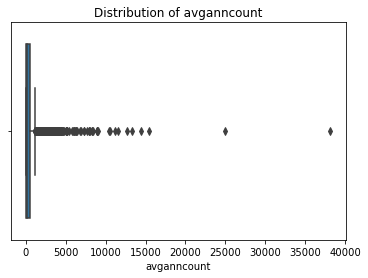

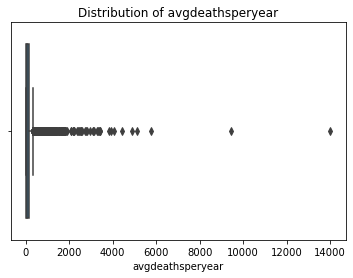

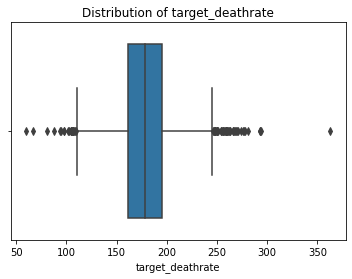

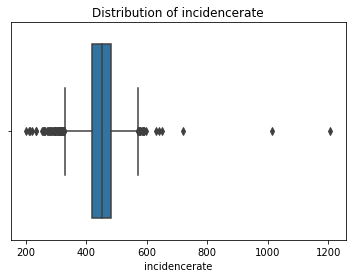

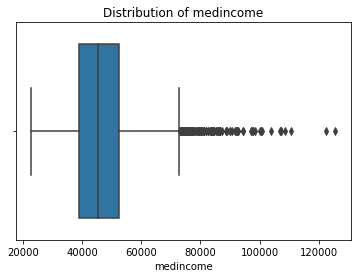

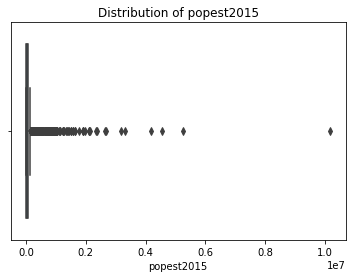

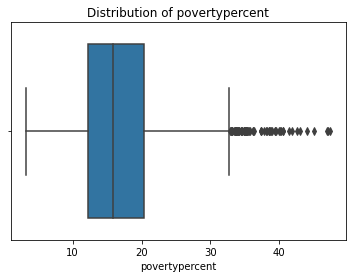

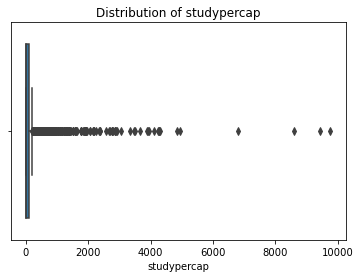

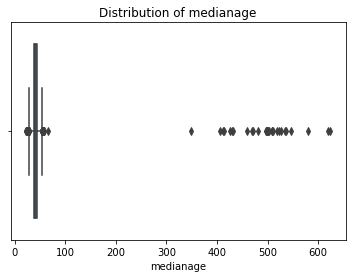

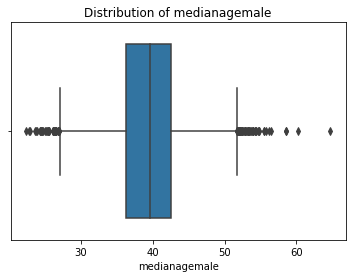

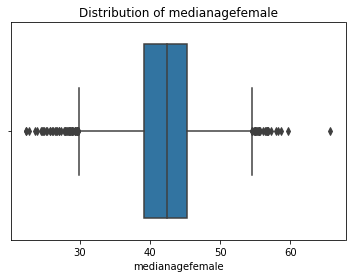

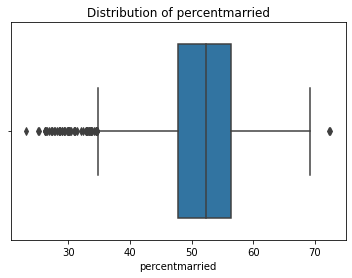

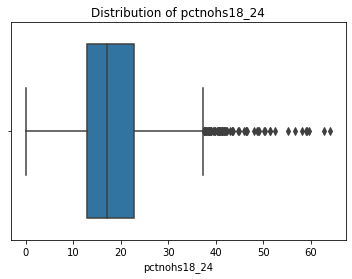

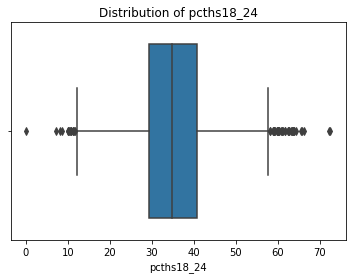

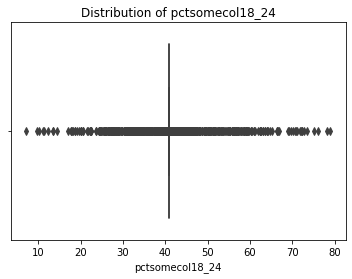

In [23]:
for i in range(len(df1.columns)):
    sns.boxplot(x = df2[df2.columns[i]])
    plt.title(f"Distribution of {df2.columns[i]}")
    plt.xlabel(df2.columns[i])
    plt.show()

<AxesSubplot:>

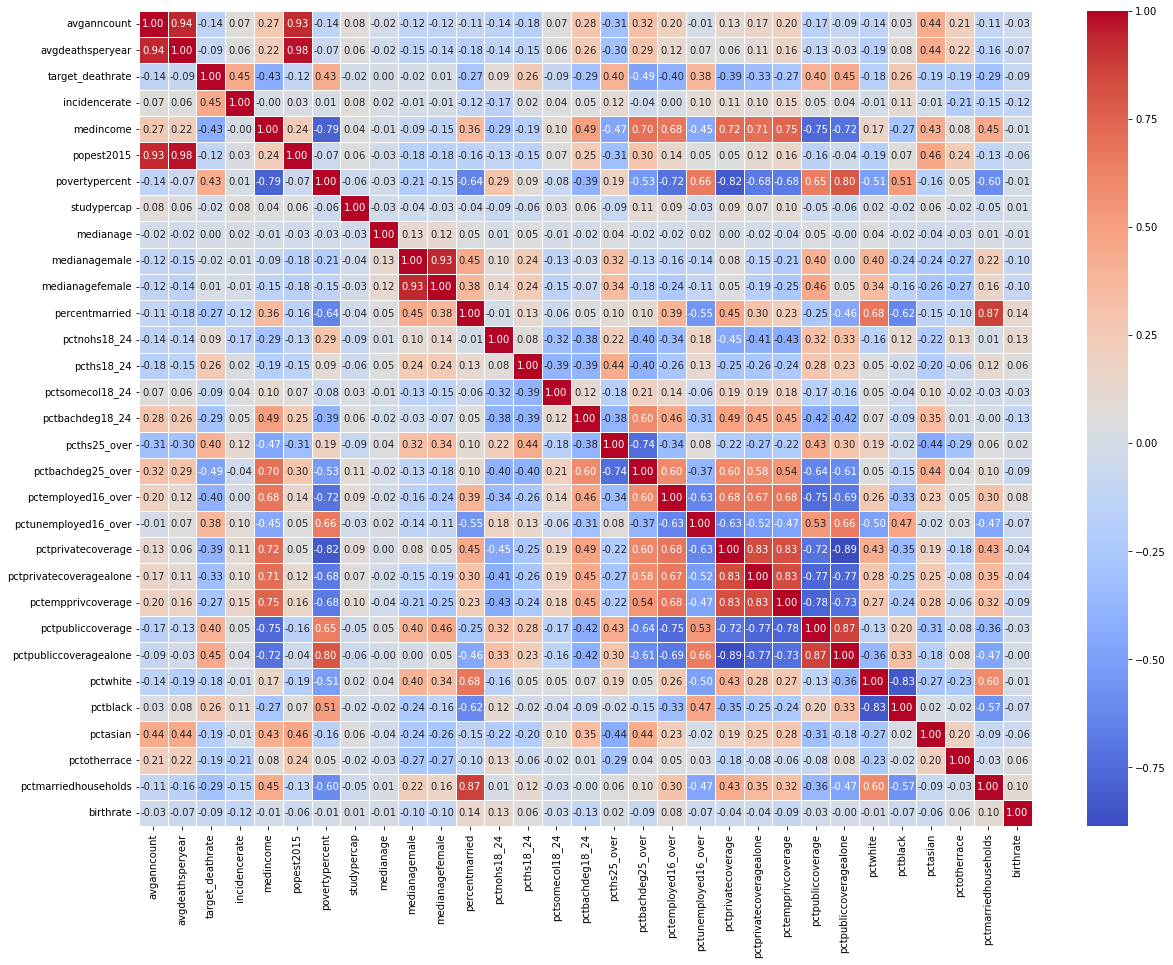

In [24]:
fig, ax = plt.subplots(figsize=(20, 15))
corr_matrix2 = df2.corr()
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt='.2f', ax = ax, linewidths=0.5)

In [25]:
X2 = df2.drop('target_deathrate', axis=1)
Y2 = df2['target_deathrate']

In [26]:
pca2 = PCA(n_components = 17)
X_pca2 = pca2.fit_transform(X2)
X_pca2.shape

(3047, 17)

In [27]:
df2.to_csv("Dataset(Large).csv")

In [28]:
df3 = pd.read_csv("Housing.csv")
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
dfSummary(df3)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,longitude[float64],Mean (sd) : -119.6 (2.0)min < med < max:-124.3 < -118.5 < -114.3IQR (CV) : 3.8 (-59.7),844 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABQ0lEQVR4nO3asU3EMABAUYOQ0pg2V9BlAViAIZggLWtlAqaiIHWaSJHCBBzxKfYl/v/VLix9ybZsP6zrGlS/x3tPQGU83XsCR9e27UeM8bJl7DRNP+M4fuWe0y0M/Y8Y46Xv++8tY4dheMk9n1u5dEMYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BDF77preSQ4m+Kha3kkOBuXbghDQxgawtAQhoYwNIShIQwNYWgIQ0MYGgL5gT/lYWVZltcQwqa7+SNDhk58WHnPPZ8SXLohDA1haAjkHp3LPM9vXdd9bh1f8geNoXfUNM3z1kNeCGV/0Lh0Qxga4tBLd8qe54/R63YJneumKWXP88fodbuEJt40nY17NIShIQ59GEuRcnCr5UUqRTWhEw9uuHOCSzeEoSEMDWFoCEND/HnqJn6gK63kXf4vktJo+TNze+0AAAAASUVORK5CYII="">",0(0.0%)
2,latitude[float64],Mean (sd) : 35.6 (2.1)min < med < max:32.5 < 34.3 < 42.0IQR (CV) : 3.8 (16.7),862 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABRUlEQVR4nO3avU3EMBxAcYOQ0pg2V9B5AViACaiY4FpmSpcJmIqC1GkiRQoT3CkWVj783q+OLpGe7+zTPw/LsgTV73HvB9A2nkp8SNu2nzHGy5prx3H8HYbhu8R9tV6R0DHGy/V6/Vlzbd/3LyXuqTz+dEMYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNESRt0DPhvh6MjI08fVkf7ohDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGuLm9CpnlDfP82sIYdU0SPu4GTpzlPde7pGOZZqmt5TS15prjzy7Rs6jczRN81zD7Lqa0G4191UT2q3mPk/dEJt/o2s53JzN5qFzDjdd132klE6z7+Ys4hC2XciH3qMzT7y777s5zxtC3kL+76I4dOjabfnX7Q+F73DeFFiZkgAAAABJRU5ErkJggg=="">",0(0.0%)
3,housing_median_age[float64],Mean (sd) : 28.6 (12.6)min < med < max:1.0 < 29.0 < 52.0IQR (CV) : 19.0 (2.3),52 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3ZMW6DQBBG4XVkiWbT4sIdF0gu4EP4BLS5FifwqVKEmgYJiZwAhbFhmcz/vppipeddlvFpnueE+N6OXgDKOB+9AO/qur7nnC9rnh2G4afv+8fea3oGof+Qc760bfu95tmu6657r+dZHN0iCC2C0CIILYLQIggtgtAiCC2C0CIILcL1CDTKnNkD16GjzJk9cB3aYhzHz6ZpvtY8q7j7w4Suquqd3b8sTGgLy+6fpukjpbTqB+SZZGjj7r/tvZ4Sioe23KSj7CYPioc23qRD7CYPGJiIkHxH/0evDo8IvSHLbT4l2/f8q8MjQm/IcptPqez3PO9oEYQWwdF9oJITOkIfqOSEjqNbBKFFEFoEoUUQWsQmt27+evRvk9D89egfR7cIQosgtIjFdzQXrFgWQ3PBioWjWwShRRBaBKFFEFoEoUUQWgShRfwCOXZ6tTQar/MAAAAASUVORK5CYII="">",0(0.0%)
4,total_rooms[float64],Mean (sd) : 2635.8 (2181.6)min < med < max:2.0 < 2127.0 < 39320.0IQR (CV) : 1700.2 (1.2),"5,926 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA8ElEQVR4nO3cMQrCMBhAYRWhS1zTwS0n8CqeoKvX6gk8lYOZu3SqJwi0EI30vW9tCT88CJn+47IsB+3fqfUA+o1z6UOM8R5C6NccMk3TO+f8rDeWaiuGDiH0wzC81hwyjuO13kj6Bq9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIYp7xraY5/mWUnqs+dflc21UCd113cXlc//NqxvC0BCGhjA0RJXH2Ba+0Nv4ALWSKf6KGSQiAAAAAElFTkSuQmCC"">",0(0.0%)
5,total_bedrooms[float64],Mean (sd) : 537.9 (421.4)min < med < max:1.0 < 435.0 < 6445.0IQR (CV) : 351.0 (1.3),"1,923 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA/0lEQVR4nO3cMQ6CMBhAYTUmLHWFwa0n8B5OnoCVM3XjBJ7KQWYWJjxBE0gqGN/7VkjT5CUd/uE/zvN80P877X0BbeOc+1DX9SOE0Cw5ZBzH9zAMz3LXUmnZ0CGEpm3b15JD+r6/lruSvsGnG8LQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBoiu/FgjWmabjHGbsm/rsHYR5HQVVVdXIPx23y6IQwNYWgIQ0MYGsLQEIaGMDSEoSGKTMbWcFy6j81DrxmXppTuMUZXSRfwAUFQNey7bTDZAAAAAElFTkSuQmCC"">",207(1.0%)
6,population[float64],Mean (sd) : 1425.5 (1132.5)min < med < max:3.0 < 1166.0 < 35682.0

In [30]:
df3 = df3.drop(['longitude','latitude','ocean_proximity'],axis = 1)
dfSummary(df3)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,housing_median_age[float64],Mean (sd) : 28.6 (12.6)min < med < max:1.0 < 29.0 < 52.0IQR (CV) : 19.0 (2.3),52 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3ZMW6DQBBG4XVkiWbT4sIdF0gu4EP4BLS5FifwqVKEmgYJiZwAhbFhmcz/vppipeddlvFpnueE+N6OXgDKOB+9AO/qur7nnC9rnh2G4afv+8fea3oGof+Qc760bfu95tmu6657r+dZHN0iCC2C0CIILYLQIggtgtAiCC2C0CIILcL1CDTKnNkD16GjzJk9cB3aYhzHz6ZpvtY8q7j7w4Suquqd3b8sTGgLy+6fpukjpbTqB+SZZGjj7r/tvZ4Sioe23KSj7CYPioc23qRD7CYPGJiIkHxH/0evDo8IvSHLbT4l2/f8q8MjQm/IcptPqez3PO9oEYQWwdF9oJITOkIfqOSEjqNbBKFFEFoEoUUQWsQmt27+evRvk9D89egfR7cIQosgtIjFdzQXrFgWQ3PBioWjWwShRRBaBKFFEFoEoUUQWgShRfwCOXZ6tTQar/MAAAAASUVORK5CYII="">",0(0.0%)
2,total_rooms[float64],Mean (sd) : 2635.8 (2181.6)min < med < max:2.0 < 2127.0 < 39320.0IQR (CV) : 1700.2 (1.2),"5,926 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA8ElEQVR4nO3cMQrCMBhAYRWhS1zTwS0n8CqeoKvX6gk8lYOZu3SqJwi0EI30vW9tCT88CJn+47IsB+3fqfUA+o1z6UOM8R5C6NccMk3TO+f8rDeWaiuGDiH0wzC81hwyjuO13kj6Bq9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIYp7xraY5/mWUnqs+dflc21UCd113cXlc//NqxvC0BCGhjA0RJXH2Ba+0Nv4ALWSKf6KGSQiAAAAAElFTkSuQmCC"">",0(0.0%)
3,total_bedrooms[float64],Mean (sd) : 537.9 (421.4)min < med < max:1.0 < 435.0 < 6445.0IQR (CV) : 351.0 (1.3),"1,923 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA/0lEQVR4nO3cMQ6CMBhAYTUmLHWFwa0n8B5OnoCVM3XjBJ7KQWYWJjxBE0gqGN/7VkjT5CUd/uE/zvN80P877X0BbeOc+1DX9SOE0Cw5ZBzH9zAMz3LXUmnZ0CGEpm3b15JD+r6/lruSvsGnG8LQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBoiu/FgjWmabjHGbsm/rsHYR5HQVVVdXIPx23y6IQwNYWgIQ0MYGsLQEIaGMDSEoSGKTMbWcFy6j81DrxmXppTuMUZXSRfwAUFQNey7bTDZAAAAAElFTkSuQmCC"">",207(1.0%)
4,population[float64],Mean (sd) : 1425.5 (1132.5)min < med < max:3.0 < 1166.0 < 35682.0IQR (CV) : 938.0 (1.3),"3,888 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA6ElEQVR4nO3csQkCMRhAYRUhTWxzhd1N4CpOcK1r3QROZWHqa1KdEwQiRE9872sTwg8PUv77dV13+n+HrQfQdxxrBymla4xxaHlkWZZnzvnebyz1Vg0dYxymaXq0PDLP87nfSPoEv24IQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQ1aWv7yilXMZxvLXcdRPwNrqEDiGc3AT8214F6h7hxzgZiwAAAABJRU5ErkJggg=="">",0(0.0%)
5,households[float64],Mean (sd) : 499.5 (382.3)min < med < max:1.0 < 409.0 < 6082.0IQR (CV) : 325.0 (1.3),"1,815 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA9ElEQVR4nO3cMQrCMBhAYRWhS1zbwS0n8CqeoKvXygk8lYOZu3SKJyi0EBvxvW9tCT88yJDhP5ZSDvp/p9YDaB/npQ99399DCMOaQ6Zpeuecn/XGUm2LoUMIwziOrzWHpJSu9UbSN3h1QxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MsbjzYYp7nW4zxseZf12C0USV013UX12D8Nq9uCENDGBrC0BCGhjA0hKEhDA1haIgqL2Nb+Fzaxu6hfS5t4wN+mS4iedTFawAAAABJRU5ErkJggg=="">",0(0.0%)
6,median_income[float64],Mean (sd) : 3.9 (1.9)min < med < max:0.5 < 3.5 < 15.0IQR (CV) : 2.2 (2.0),"12,928 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9

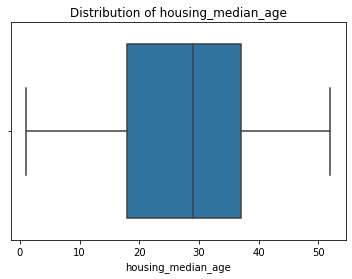

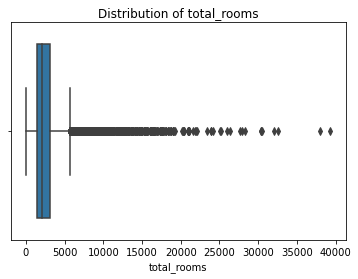

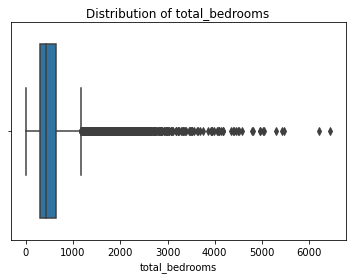

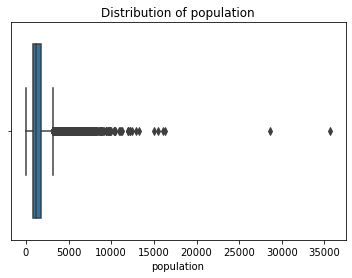

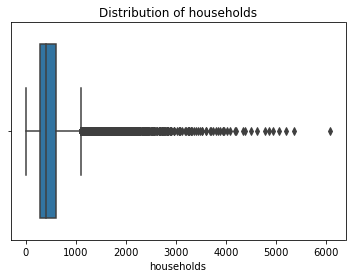

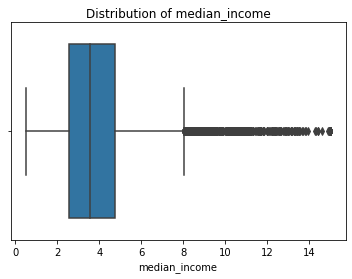

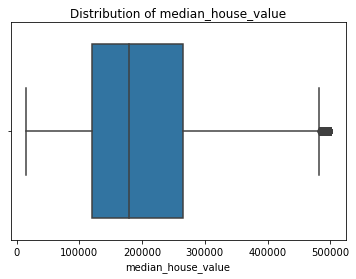

In [31]:
for i in range(len(df3.columns)):
    sns.boxplot(x = df3[df3.columns[i]])
    plt.title(f"Distribution of {df3.columns[i]}")
    plt.xlabel(df3.columns[i])
    plt.show()

<AxesSubplot:>

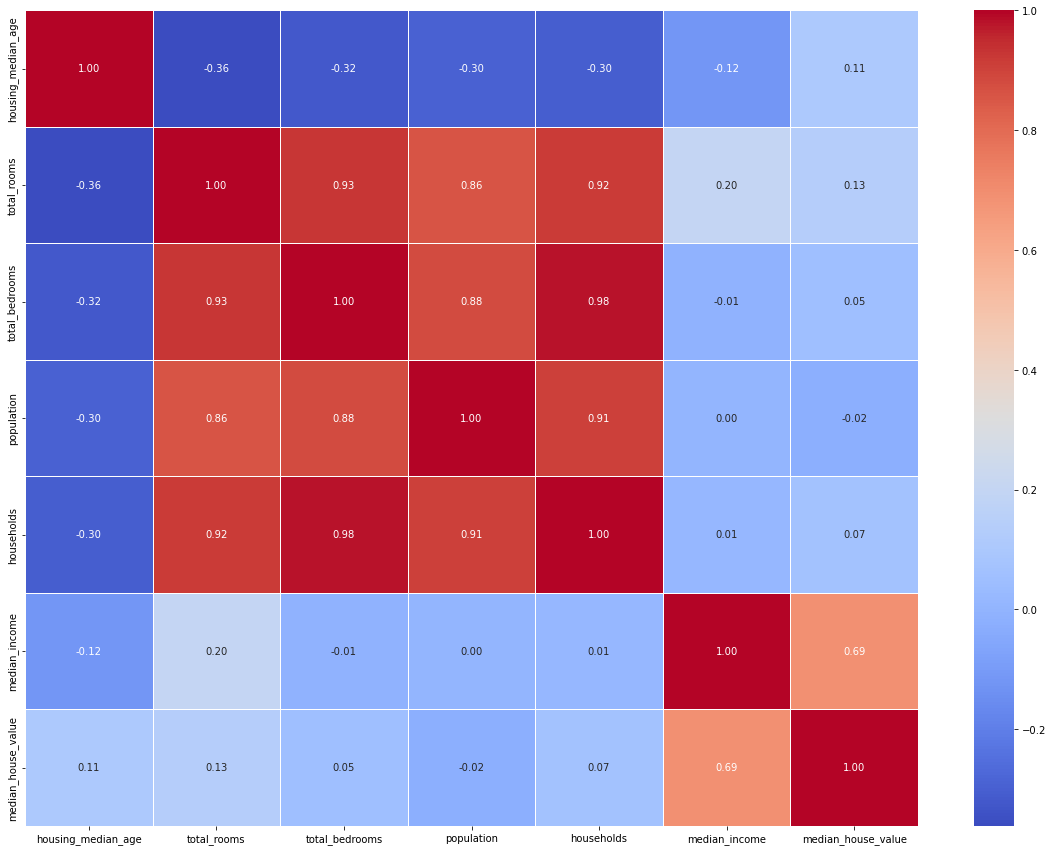

In [32]:
fig, ax = plt.subplots(figsize=(20, 15))
corr_matrix3 = df3.corr()
sns.heatmap(corr_matrix3, cmap='coolwarm', annot=True, fmt='.2f', ax = ax, linewidths=0.5)

In [33]:
X3 = df3.drop('median_house_value', axis=1)
Y3 = df3['median_house_value']

In [34]:
pca3 = PCA(n_components = 4)
X_pca3 = pca3.fit_transform(X2)
X_pca3.shape

(3047, 4)

In [35]:
df3.to_csv("Dataset(Small).csv")